In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-clickstream-and-transaction-dataset/ecommerce_clickstream_transactions.csv


In [2]:
df = pd.read_csv('/kaggle/input/e-commerce-clickstream-and-transaction-dataset/ecommerce_clickstream_transactions.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome
0,1,1,2024-07-07 18:00:26.959902,page_view,NaN,NaN,NaN
1,1,1,2024-03-05 22:01:00.072000,page_view,NaN,NaN,NaN
2,1,1,2024-03-23 22:08:10.568453,product_view,prod_8199,NaN,NaN
3,1,1,2024-03-12 00:32:05.495638,add_to_cart,prod_4112,NaN,NaN
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_3354,NaN,NaN


In [3]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 74817 rows and 7 columns


In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [5]:
# Create the 'Hour' column - this is your grouping column!
df['Hour'] = df['Timestamp'].dt.hour

In [6]:
df.columns

Index(['UserID', 'SessionID', 'Timestamp', 'EventType', 'ProductID', 'Amount',
       'Outcome', 'Hour'],
      dtype='object')

In [7]:
distinct_categories = df['EventType'].unique()
distinct_categories

array(['page_view', 'product_view', 'add_to_cart', 'login', 'click',
       'logout', 'purchase'], dtype=object)

In [8]:
# 1. Identify Conversion Events #add_to_cart
df['IsConversion'] = df['EventType'].apply(lambda x: 1 if x == 'purchase' else 0)

# 2. Group by Hour and Aggregate
hourly_metrics = df.groupby('Hour').agg(
    TotalViews=('EventType', 'count'),          # Total browsing events (denominator)
    TotalConversions=('IsConversion', 'sum')    # Total successful chats (numerator)
).reset_index()
print("Hourly Metrics Calculated:")
print(hourly_metrics.head())

Hourly Metrics Calculated:
   Hour  TotalViews  TotalConversions
0     0        3061               441
1     1        3074               439
2     2        3201               432
3     3        3117               425
4     4        3036               472


In [9]:
# 1. Calculate the Conversion Rate
hourly_metrics['ConversionRate'] = (hourly_metrics['TotalConversions'] / hourly_metrics['TotalViews']) * 100

# 2. Sort to find the Most and Least Efficient Time
best_hour = hourly_metrics.sort_values(by='ConversionRate', ascending=False).iloc[0]
worst_hour = hourly_metrics.sort_values(by='ConversionRate', ascending=True).iloc[0]

In [10]:
# Print the Final Results (Your Key Deliverable Data!)
print("\n--- FINAL KEY INSIGHTS ---")
print(f"Most Efficient Browsing Time: Hour {best_hour['Hour']} (CVR: {best_hour['ConversionRate']:.2f}%)")
print(f"Least Efficient Browsing Time: Hour {worst_hour['Hour']} (CVR: {worst_hour['ConversionRate']:.2f}%)")


--- FINAL KEY INSIGHTS ---
Most Efficient Browsing Time: Hour 4.0 (CVR: 15.55%)
Least Efficient Browsing Time: Hour 14.0 (CVR: 13.30%)


In [11]:
# Save the final table for visualization (Phase 3)
hourly_metrics.to_csv('hourly_conversion_data_for_dashboard.csv', index=False)

Charts

•	KPI Card 1 (Total Value): Total Monthly Conversion Attempts (The raw number of initiate_perchase events). 
A Line Chart is perfect for time-series data

•	KPI Card 2 (Efficiency): Overall Site Conversion Rate (The average CVR).
A Line Chart is perfect for time-series data

•	KPI Card 3 (Comparison): W1 Retention Rate (industry benchmark, e.g., "Industry Average: 25% | Current dataset: 32%").


In [12]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome,Hour,IsConversion
0,1,1,2024-07-07 18:00:26.959902,page_view,NaN,NaN,NaN,18,0
1,1,1,2024-03-05 22:01:00.072000,page_view,NaN,NaN,NaN,22,0
2,1,1,2024-03-23 22:08:10.568453,product_view,prod_8199,NaN,NaN,22,0
3,1,1,2024-03-12 00:32:05.495638,add_to_cart,prod_4112,NaN,NaN,0,0
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_3354,NaN,NaN,22,0


In [13]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome,Hour,IsConversion
0,1,1,2024-07-07 18:00:26.959902,page_view,NaN,NaN,NaN,18,0
1,1,1,2024-03-05 22:01:00.072000,page_view,NaN,NaN,NaN,22,0
2,1,1,2024-03-23 22:08:10.568453,product_view,prod_8199,NaN,NaN,22,0
3,1,1,2024-03-12 00:32:05.495638,add_to_cart,prod_4112,NaN,NaN,0,0
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_3354,NaN,NaN,22,0


Monthly Metrics Calculated:


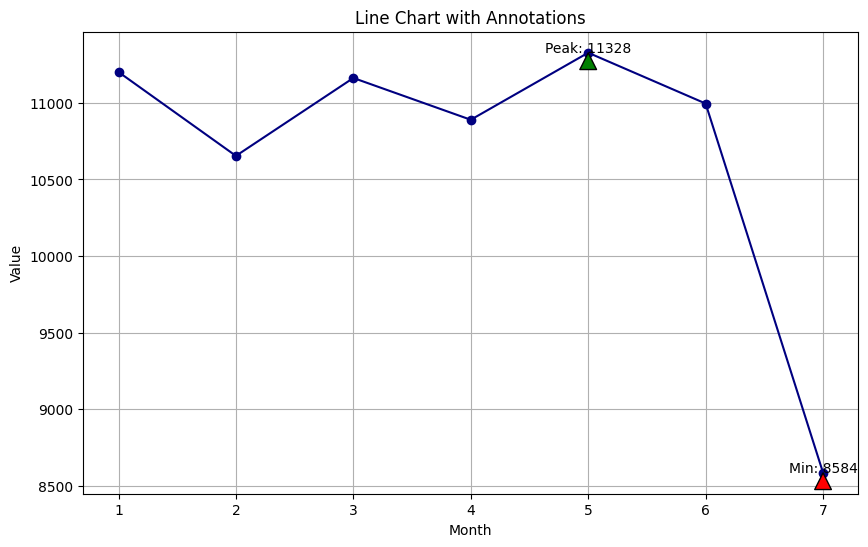

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the 'Month' column
df['Month'] = df['Timestamp'].dt.month
# Identify Conversion Events #add_to_cart
df['InitiateConversion'] = df['EventType'].apply(lambda x: 1 if x == 'add_to_cart' else 0)

# 2. Group by Hour and Aggregate
monthly_metrics = df.groupby('Month').agg(         # Total browsing events (denominator)
    TotalInitiates=('InitiateConversion', 'count')    # Total successful chats (numerator)
).reset_index()
print("Monthly Metrics Calculated:")


# 2. Create the line chart
monthly_metrics.set_index('Month', inplace=True) # Set 'Month' as index for time series plotting
ax = monthly_metrics['TotalInitiates'].plot(kind='line', marker='o', figsize=(10, 6), color='navy')

# 3. Add annotations
# Annotate a specific point (e.g., the peak value)
peak_month = monthly_metrics['TotalInitiates'].idxmax()
peak_value = monthly_metrics['TotalInitiates'].max()
ax.annotate(
    f'Peak: {peak_value}',
    xy=(peak_month, peak_value),  # Coordinates of the point to annotate
    xytext=(peak_month, peak_value), # Coordinates for the text
    arrowprops=dict(facecolor='green', shrink=0.05), # Arrow properties
    ha='center' # Horizontal alignment of the text
)

# Annotate another point (e.g., the minimum value)
min_month = monthly_metrics['TotalInitiates'].idxmin()
min_value = monthly_metrics['TotalInitiates'].min()
ax.annotate(
    f'Min: {min_value}',
    xy=(min_month, min_value),
    xytext=(min_month, min_value),
    arrowprops=dict(facecolor='red', shrink=0.05),
    ha='center'
)

# 4. Customize the plot (optional)
plt.title('Line Chart with Annotations')
plt.xlabel('Month')
plt.ylabel('Value')
plt.grid(True)

# 5. Display the plot
plt.show()

In [15]:
hourly_metrics.head()

,Hour,TotalViews,TotalConversions,ConversionRate
0,0,3061,441,14.407057
1,1,3074,439,14.281067
2,2,3201,432,13.495783
3,3,3117,425,13.634905
4,4,3036,472,15.546772


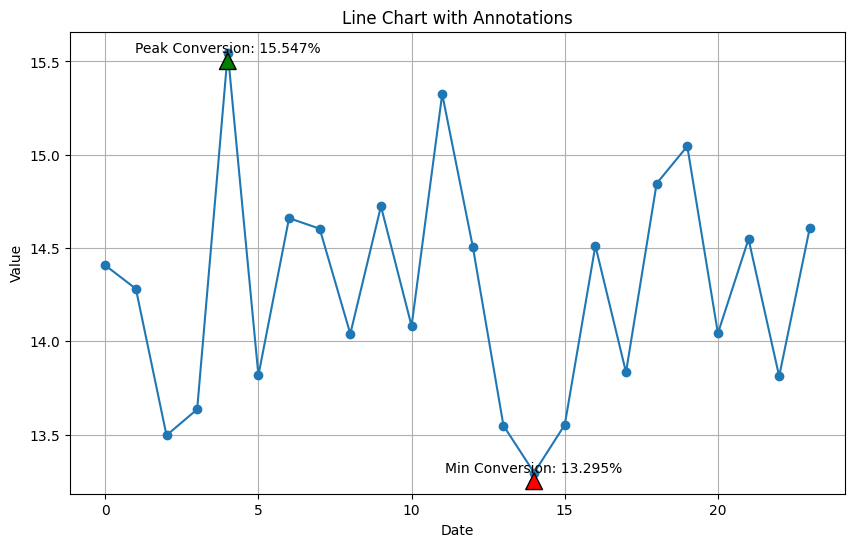

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

hourly_metrics.set_index('Hour', inplace=True) # Set 'Date' as index for time series plotting

# 2. Create the line chart
ax = hourly_metrics['ConversionRate'].plot(kind='line', marker='o', figsize=(10, 6))

# 3. Add annotations
# Annotate a specific point (e.g., the peak value)
peak_hour = hourly_metrics['ConversionRate'].idxmax()
peak_value = round(hourly_metrics['ConversionRate'].max(),3)
ax.annotate(
    f'Peak Conversion: {peak_value}%',
    xy=(peak_hour, peak_value),  # Coordinates of the point to annotate
    xytext=(peak_hour, peak_value), # Coordinates for the text
    arrowprops=dict(facecolor='green', shrink=0.05), # Arrow properties
    ha='center' # Horizontal alignment of the text
)

# Annotate another point (e.g., the minimum value)
min_hour = hourly_metrics['ConversionRate'].idxmin()
min_value = round(hourly_metrics['ConversionRate'].min(),3)
ax.annotate(
    f'Min Conversion: {min_value}%',
    xy=(min_hour, min_value),
    xytext=(min_hour, min_value),
    arrowprops=dict(facecolor='red', shrink=0.05),
    ha='center'
)

# 4. Customize the plot (optional)
plt.title('Line Chart with Annotations')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)

# 5. Display the plot
plt.show()

W1 Retention Rate

In [17]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome,Hour,IsConversion,Month,InitiateConversion
0,1,1,2024-07-07 18:00:26.959902,page_view,NaN,NaN,NaN,18,0,7,0
1,1,1,2024-03-05 22:01:00.072000,page_view,NaN,NaN,NaN,22,0,3,0
2,1,1,2024-03-23 22:08:10.568453,product_view,prod_8199,NaN,NaN,22,0,3,0
3,1,1,2024-03-12 00:32:05.495638,add_to_cart,prod_4112,NaN,NaN,0,0,3,1
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_3354,NaN,NaN,22,0,2,1


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Find the first time each user appeared (Acquisition Date)
cohort_map = df.groupby('UserID')['Timestamp'].min().reset_index()
cohort_map.rename(columns={'Timestamp': 'acquisition_date'}, inplace=True)


In [19]:
# 2. Assign the user to their Cohort Week (Week 0) samuuhaya/hamudaawa
# We use .to_period('W') to assign a unique week number (e.g., 2025-01-01/2025-01-07)
cohort_map['cohort_week'] = cohort_map['acquisition_date'].dt.to_period('W')

print("Cohort Map created with Acquisition Week:")
print(cohort_map.head())

Cohort Map created with Acquisition Week:
   UserID           acquisition_date            cohort_week
0       1 2024-01-01 23:09:51.956825  2024-01-01/2024-01-07
1       2 2024-01-01 14:07:40.491141  2024-01-01/2024-01-07
2       3 2024-01-05 15:44:25.330449  2024-01-01/2024-01-07
3       4 2024-01-01 02:11:06.298369  2024-01-01/2024-01-07
4       5 2024-01-01 14:03:07.709158  2024-01-01/2024-01-07


In [20]:
# 1. Merge the cohort week onto the main DataFrame
df_merged = pd.merge(df, cohort_map[['UserID', 'cohort_week']], on='UserID', how='left')

# 2. Map the week number of the event itself
df_merged['activity_week'] = df_merged['Timestamp'].dt.to_period('W')

print("DataFrame is ready for retention calculation:")
print(df_merged[['UserID', 'cohort_week', 'activity_week']].head())

DataFrame is ready for retention calculation:
   UserID            cohort_week          activity_week
0       1  2024-01-01/2024-01-07  2024-07-01/2024-07-07
1       1  2024-01-01/2024-01-07  2024-03-04/2024-03-10
2       1  2024-01-01/2024-01-07  2024-03-18/2024-03-24
3       1  2024-01-01/2024-01-07  2024-03-11/2024-03-17
4       1  2024-01-01/2024-01-07  2024-02-19/2024-02-25


In [21]:
# 1. Calculate the difference between activity week and acquisition week
# We convert to integer representation of weeks since the start of the data
df_merged['week_difference'] = (df_merged['activity_week'].astype(int) - df_merged['cohort_week'].astype(int))

# 2. Focus on the core cohort (users who appeared in Week 0)
# Group by both cohort_week and week_difference to get unique users for each retention week
cohort_counts = df_merged.groupby(['cohort_week', 'week_difference'])['UserID'].nunique().reset_index(name='unique_users')

# 3. Choose one cohort (the largest one is usually best for stability)
# Get the first unique cohort week in your data:
initial_cohort = cohort_counts['cohort_week'].unique()[0]

# Filter to get only the data for that initial cohort
target_cohort = cohort_counts[cohort_counts['cohort_week'] == initial_cohort]

# 4. Final Calculation
cohort_size = target_cohort[target_cohort['week_difference'] == 0]['unique_users'].iloc[0]
retained_users = target_cohort[target_cohort['week_difference'] == 1]['unique_users'].iloc[0]

w1_retention_rate = (retained_users / cohort_size) * 100

print(f"\n--- W1 Retention Calculation ---")
print(f"Initial Cohort Size (Week 0): {cohort_size}")
print(f"Retained Users in Week 1: {retained_users}")
print(f"Final W1 Retention Rate: {w1_retention_rate:.2f}%")


--- W1 Retention Calculation ---
Initial Cohort Size (Week 0): 928
Retained Users in Week 1: 848
Final W1 Retention Rate: 91.38%
